<p style="padding: 10px; border: 1px solid black;">
<img src="images/MLU-NEW-logo.png" alt="drawing" width="400"/> <br/>


# <a name="0">MLU LangChain Workshop </a>
## <a name="0">Lab 1: Introduction to LangChain </a>

This notebook demonstrates how to use pre-trained Large Language Models (LLM) for text generation. LLMs are trained on massive amounts of data, making them capable of solving several NLP tasks.
[LangChain](https://python.langchain.com/docs/get_started/introduction#get-started) offers several modules that simplifies the use of LLMs for inference. In this notebook, we will use LangChain's prompt templates to effectively solve different tasks with minimal lift.

1. <a href="#1">Import libraries</a>
2. <a href="#2">Using Bedrock for Inference</a>
3. <a href="#3">Prompt Templates</a>
4. <a href="#4">Quizzes</a>

__Jupyter notebooks environment__:

* Jupyter notebooks allow creating and sharing documents that contain both code and rich text cells. If you are not familiar with Jupyter notebooks, read more [here](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html). 
* This is a quick-start demo to bring you up to speed on coding and experimenting with machine learning. Move through the notebook __from top to bottom__. 
* Run each code cell to see its output. To run a cell, click within the cell and press __Shift+Enter__, or click __Run__ from the top of the page menu. 
* A `[*]` symbol next to the cell indicates the code is still running. A `[#]` symbol, where # is an integer, indicates it is finished.
* Beware, __some code cells might take longer to run__, sometimes 5-10 minutes (depending on the task, installing packages and libraries, training models, etc.)
    
    
Please work top to bottom of this notebook and don't skip sections as this could lead to error messages due to missing code.

---

You will be presented with two kinds of exercises throughout the notebook: activities and challenges. <br/>

| <img style="float: center;" src="./images/activity.png" alt="Activity" width="125"/>| <img style="float: center;" src="./images/challenge.png" alt="Challenge" width="125"/>|
| --- | --- |
|<p style="text-align:center;">No coding is needed for an activity. You try to understand a concept, <br/>answer questions, or run a code cell.</p> |<p style="text-align:center;">Challenges are where you test your understanding by taking a short quiz.</p> |

----    


Let's start by loading some libraries and packages!

---

### <a name="1">Import libraries</a>
(<a href="#0">Go to top</a>)


First, let's install and import the necessary libraries, including the [LangChain](https://python.langchain.com/docs/get_started/installation) library


In [1]:
%%capture
!pip3 install -r requirements.txt --quiet

In [2]:
import warnings

warnings.filterwarnings("ignore")

import boto3
from IPython.display import Markdown

---

### <a name="#2">Using Bedrock for Inference</a>
(<a href="#0">Go to top</a>)

[Amazon Bedrock](https://aws.amazon.com/bedrock/) is a fully managed service that offers a choice of high-performing foundation models (FMs) from leading AI companies like [AI21 Labs](https://www.ai21.com/), [Anthropic](https://www.anthropic.com/), [Cohere](https://cohere.com/), [Meta](https://ai.meta.com/), [Stability AI](https://stability.ai/), and [Amazon](https://aws.amazon.com/bedrock/titan/) with a single API, along with a broad set of capabilities you need to build generative AI applications, simplifying development while maintaining privacy and security.
Amazon Bedrock is serverless, which means you don't have to manage any infrastructure and simply use and integrate the LLMs hosted on the platform  within applications.

In this workshop, we will primarily use LLMs through Bedrock APIs. 

Each model hosted on Bedrock has a different set of inference parameters. Please refer this [page](https://docs.aws.amazon.com/bedrock/latest/userguide/model-parameters.html) to identify the inference parameters for the selected LLM.

**Please opt for frugal practices when using Bedrock such as using smaller LLMs for simpler tasks and only reserving the use of the larger LLMs for more complex use cases.**

---

In [3]:
from langchain_aws import BedrockLLM
from mlu_utils.helpers import validate_inference_parameters

# Define the bedrock client
bedrock = boto3.client(
    service_name="bedrock",
    region_name="us-east-1",
    endpoint_url="https://bedrock.us-east-1.amazonaws.com",
)

# Define the bedrock-runtime client that will be used for predictions
bedrock_runtime = boto3.client(service_name="bedrock-runtime")


##########################################################################
########################### Select the LLM ###############################

bedrock_model_id = "amazon.titan-text-premier-v1:0"
# bedrock_model_id = "mistral.mixtral-8x7b-instruct-v0:1"

##########################################################################
##########################################################################

# Each model has a different set of inference parameters
inference_modifier = {
    "maxTokenCount": 2048,
    "temperature": 0.0,
    "topP": 1,
}

# Sanity check for the inference parameters
validate_inference_parameters(
    model_id=bedrock_model_id, inference_parameters=inference_modifier
)

# Define the langchain module with the selected bedrock model
bedrock_llm = BedrockLLM(
    model_id=bedrock_model_id, client=bedrock_runtime, model_kwargs=inference_modifier
)

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h2><i>Try it Yourself!</i></h2>
    <br>
    <p style="text-align:center;margin:auto;"><img src="./images/activity.png" alt="Activity" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">Try different prompts and observe the responses generated by the model.</p>
    <p style=" text-align: center; margin: auto;"><b>Note: Results may not be factually accurate and may be based on false assumptions.</b></p>
    <br>
</div>


In [4]:
# Use the Bedrock API for inference using the inference parameters
bedrock_llm.invoke("What is the capital of Spain?")

'The capital of Spain is Madrid. It is a vibrant city known for its rich history, culture, and cuisine. Madrid is home to many famous landmarks, museums, and parks, making it a popular destination for tourists from around the world.'

### <a name="#3">Prompt Templates</a>
(<a href="#0">Go to top</a>)

---

### PromptTemplate

The input to the LLM (or any foundational model) is called a prompt. Prompts are typically in the form of text. It provides the LLM with all the necessary information to produce the respective response.
Prompt templates are parameterized model inputs serving as pre-defined recipes for LLMs. These templates can be reusable and enables LLMs to adapt to more number of tasks with minimal effort.

<div>
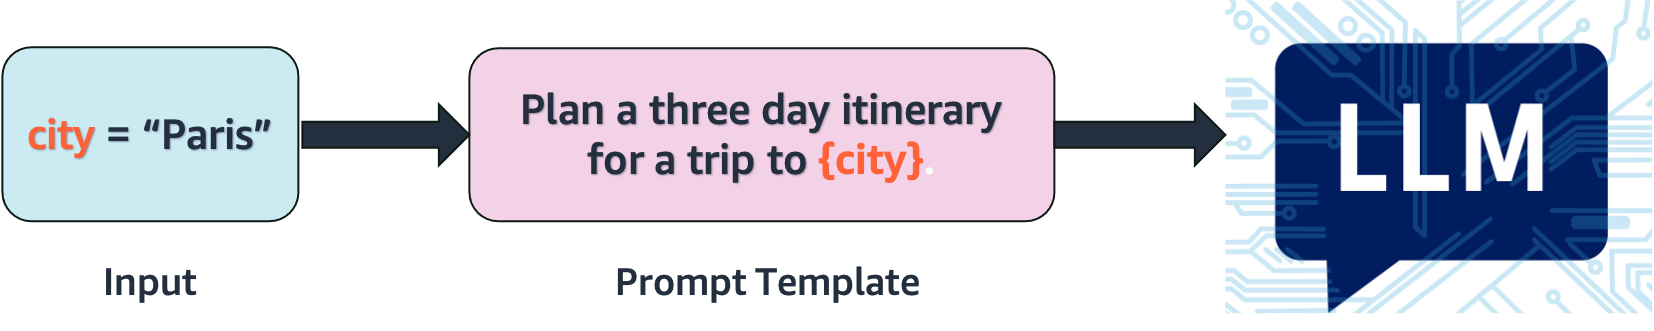
</div>

In [5]:
from langchain.prompts import PromptTemplate

template = """
You are a travel agent specialized in planning activities for tourists.
Plan a three day itenerary for a trip to {city}
"""

# Define the prompt template from the string. The input variables are automatically inferred
prompt_template = PromptTemplate.from_template(template)

# Create the prompt for the LLM by setting the input variable
prompt_message = prompt_template.format(city="Paris")
print("Prompt: {}".format(prompt_message))

Prompt: 
You are a travel agent specialized in planning activities for tourists.
Plan a three day itenerary for a trip to Paris



In [6]:
# Use the text generation pipeline to generate the response
prompt_template_response = bedrock_llm.invoke(prompt_message)

# Printing the response in a favorable format
Markdown(prompt_template_response)

Day 1:
- Start your day with a croissant and coffee at a local café.
- Visit the iconic Eiffel Tower and take in the stunning views of the city.
- Walk along the Seine River and admire the beautiful architecture.
- Explore the Louvre Museum and see famous works of art like the Mona Lisa.
- Have lunch at a traditional French bistro.
- Visit the Notre Dame Cathedral and marvel at its Gothic architecture.
- Take a stroll through the Latin Quarter and explore its narrow streets and charming shops.
- End your day with a romantic dinner at a Michelin-starred restaurant.

Day 2:
- Start your day with a visit to the Palace of Versailles and explore its opulent rooms and gardens.
- Have lunch at a local market and try some French delicacies.
- Visit the Musée d'Orsay and see works of art by famous French artists like Monet and Van Gogh.
- Take a walk through the Jardin des Tuileries and enjoy the beautiful gardens.
- Visit the Arc de Triomphe and take in the views of the Champs-Élysées.
- Have dinner at a cozy French bistro and try some traditional dishes like escargots or coq au vin.

Day 3:
- Start your day with a visit to the Montmartre neighborhood and see the Sacré-Cœur Basilica.
- Take a walk through the charming streets of Montmartre and visit local art galleries and shops.
- Have lunch at a local creperie and try some delicious crepes.
- Visit the Musée de l'Orangerie and see Monet's famous water lily paintings.
- Take a stroll through the Luxembourg Gardens and enjoy the peaceful atmosphere.
- End your day with a visit to the Sainte-Chapelle and see its stunning stained glass windows.

This itinerary includes some of the most famous landmarks and attractions in Paris, as well as some off-the-beaten-path experiences. It's a great way to get a taste of the city's rich history, culture, and cuisine.

### PromptTemplate with Variable Number of Inputs

We can use multiple inputs while defining a prompt template. 
Note that when using multiple inputs, the input keys should match the keys in the prompt template.

<div>
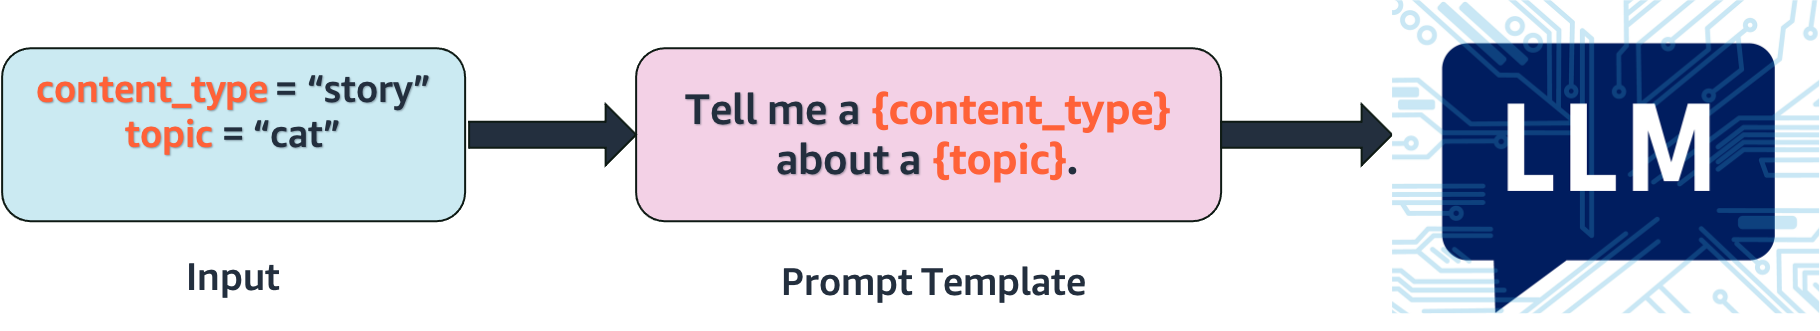
</div>

In [7]:
multi_input_prompt = """
Tell me a {content_type} about a {topic}.
"""

# Define a prompt template from the string above. The input keys are automatically inferred.
multi_input_template = PromptTemplate.from_template(multi_input_prompt)

# Create the prompt for the LLM by setting the input variables
multi_input_message = multi_input_template.format(
    content_type="bedtime story", topic="cat"
)

In [8]:
# Use the text generation pipeline to generate the response
multi_input_template_response = bedrock_llm.invoke(multi_input_message)

# Printing the response in a favorable format
Markdown(multi_input_template_response)

Once upon a time, in a small village nestled in the countryside, there lived a curious and adventurous cat named Whiskers. Unlike other cats, Whiskers was always eager to explore the world beyond the comfort of his home.

One evening, as the sun began to set and the village settled into a peaceful slumber, Whiskers decided it was the perfect time for an adventure. He sneaked out of his house and made his way through the quiet streets, his eyes shining with excitement.

As he wandered further from the village, Whiskers came across a beautiful meadow filled with tall grasses and wildflowers. He decided to take a break and rest among the flowers, listening to the gentle rustling of the wind and the soft chirping of crickets.

As he lay there, Whiskers felt a sudden urge to explore the meadow further. He followed a narrow path that led him to a small stream, where he watched as fish swam gracefully through the water. He then climbed up a nearby tree and marveled at the view of the village below, the lights from the windows twinkling like stars in the darkness.

As the night grew darker, Whiskers realized that it was time to head back home. He made his way back through the meadow, feeling a sense of contentment and satisfaction. He had discovered a whole new world beyond the village, and he couldn't wait to explore more.

When Whiskers finally returned home, he was greeted by his family with warm embraces and gentle scoldings for staying out so late. But Whiskers didn't mind. He knew that his adventure had been worth it, and he couldn't wait to embark on another one soon.

And so, with a contented purr, Whiskers curled up in his cozy bed and drifted off to sleep, dreaming of all the exciting adventures that awaited him in the days to come.

### ChatPromptTemplate

ChatPromptTemplates are designed for chat models. Conversational tasks typically involve a `System Message`, `Human Message` and an `AI Message`. 
- `System Message`: a message setting the objectives the AI should follow
- `Human Message`: a message sent from the perspective of the human
- `AI Message`: a message sent from the perspective of the AI the human is interacting with

In the following example, we would only use the `SystemMessage` and `HumanMessage` as this would be a one-off conversation.

In [9]:
from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
)

# Define the system message
system_message = "Translate '{input_language}' into {output_language}."

# Define the human message
human_message = "{text}"

# Create respective prompt templates
system_message_template = SystemMessagePromptTemplate.from_template(system_message)
human_message_template = HumanMessagePromptTemplate.from_template(human_message)

# Define the chat template that is based on the system message template and the human message template
chat_template = ChatPromptTemplate.from_messages(
    [system_message_template, human_message_template]
)

# Create the prompt for the LLM by setting the input variables
chat_message = chat_template.format(
    input_language="English",
    output_language="French",
    text="I think AI is really cool!",
)

In [10]:
# Use the text generation pipeline to generate the response
chat_template_response = bedrock_llm.invoke(chat_message)

# Printing the response in a favorable format
Markdown(chat_template_response)

Je pense que l'IA est vraiment cool !

---

### <a name="4">Quizzes</a>
(<a href="#0">Go to top</a>)

Well done on completing the lab! Now, it's time for a brief knowledge assessment.

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h2><i>Try it Yourself!</i></h2>
    <br>
    <p style="text-align:center;margin:auto;"><img src="./images/challenge.png" alt="Challenge" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">Answer the following questions to test your understanding of using prompt templates for inference.</p>
    <br>
</div>


In [11]:
from mlu_utils.quiz_questions import *

lab1_question1

In [12]:
lab1_question2

<p style="padding: 10px; border: 1px solid black;">
<img src="images/MLU-NEW-logo.png" alt="drawing" width="400"/> <br/>

# Thank you!